##### 生成两个类别的点

In [25]:
import numpy as np

num_samples_pre_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_pre_class)

positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_pre_class)

inputs = np.vstack((negative_samples, positive_samples)).astype('float32')
targets = np.vstack((
    np.zeros((num_samples_pre_class, 1), dtype='float32'), 
    np.ones((num_samples_pre_class, 1), dtype='float32')))

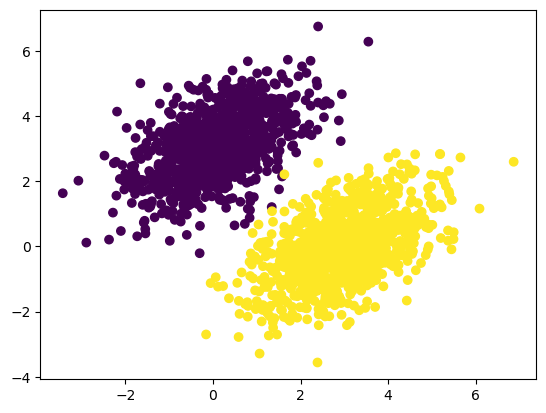

In [26]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

##### 训练

In [27]:
import tensorflow as tf

input_dim = 2
out_dim  = 1

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, out_dim)))
b = tf.Variable(initial_value=tf.random.uniform(shape=(out_dim,)))

def model(inputs):
    return tf.matmul(inputs, W) + b

def square_loss(targets, predictions):
    per_sample_loss = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_loss)

learning_rate = 0.1
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)

    gard_w, gard_b = tape.gradient(loss, [W, b])
    W.assign_sub(gard_w * learning_rate)
    b.assign_sub(gard_b * learning_rate)
    return loss

loss at setp 0: 3.4471
loss at setp 1: 0.4483
loss at setp 2: 0.0875
loss at setp 3: 0.0350
loss at setp 4: 0.0273
loss at setp 5: 0.0261
loss at setp 6: 0.0259
loss at setp 7: 0.0258
loss at setp 8: 0.0257
loss at setp 9: 0.0256
loss at setp 10: 0.0256
loss at setp 11: 0.0255
loss at setp 12: 0.0254
loss at setp 13: 0.0254
loss at setp 14: 0.0254
loss at setp 15: 0.0253
loss at setp 16: 0.0253
loss at setp 17: 0.0252
loss at setp 18: 0.0252
loss at setp 19: 0.0252
loss at setp 20: 0.0252
loss at setp 21: 0.0251
loss at setp 22: 0.0251
loss at setp 23: 0.0251
loss at setp 24: 0.0251
loss at setp 25: 0.0251
loss at setp 26: 0.0250
loss at setp 27: 0.0250
loss at setp 28: 0.0250
loss at setp 29: 0.0250
loss at setp 30: 0.0250
loss at setp 31: 0.0250
loss at setp 32: 0.0250
loss at setp 33: 0.0250
loss at setp 34: 0.0250
loss at setp 35: 0.0250
loss at setp 36: 0.0250
loss at setp 37: 0.0249
loss at setp 38: 0.0249
loss at setp 39: 0.0249


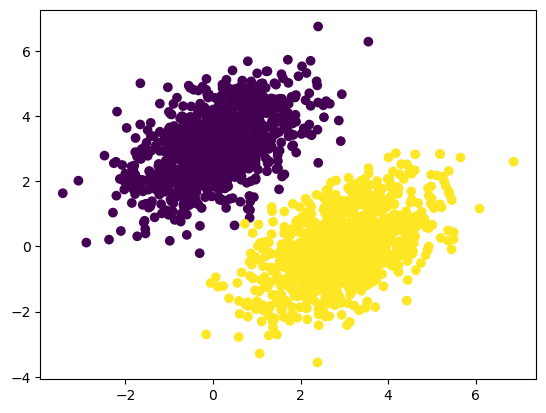

In [28]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"loss at setp {step}: {loss:.4f}")

predictions = model(inputs)

plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0]>0.5)
plt.show()

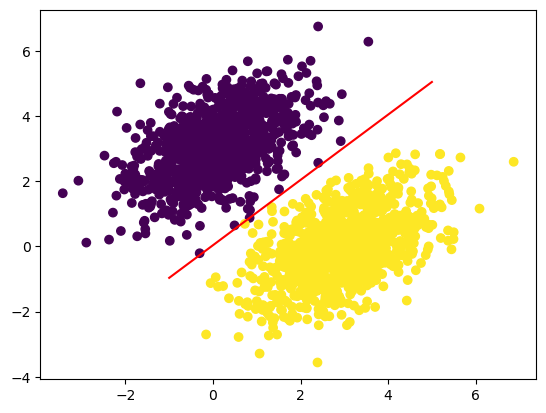

In [29]:
x = np.linspace(-1, 5, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)